In [4]:
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
import re,string
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import librosa
import sklearn

Male
(20, 130)
Femaile
(20, 134)


C:\Users\knowl\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\knowl\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
C:\Users\knowl\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\knowl\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the da

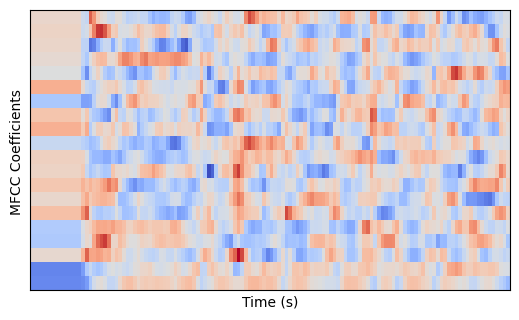

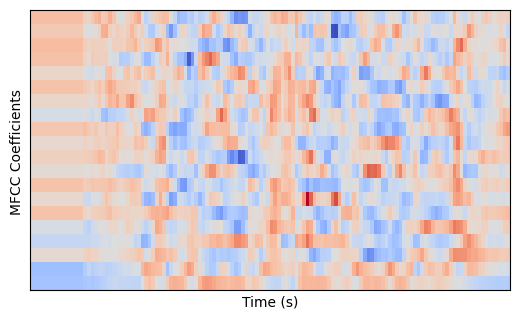

In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
print("Male")
x, fs = librosa.load("E:\\TextMining\\WAVE\\Data\\Male\\A rafay 18 degar.wav")
plt.rcParams['figure.figsize'] = (5,3) 
S = librosa.feature.melspectrogram(y=x, sr=fs, n_mels=128,fmax=8000)
mfccs=librosa.feature.mfcc(S=librosa.power_to_db(S))
print(mfccs.shape)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=fs)
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients ")
plt.tight_layout(pad=0)
plt.savefig('Male.jpg', bbox_inches='tight')

plt.figure(figsize=(5, 3))
import matplotlib.pyplot as plt
print("Femaile")
x, fs = librosa.load("E:\\TextMining\\WAVE\\Data\\Female\\Aima 17 tudal.wav")
plt.rcParams['figure.figsize'] = (3,2) 
S = librosa.feature.melspectrogram(y=x, sr=fs, n_mels=128,fmax=8000)
mfccs=librosa.feature.mfcc(S=librosa.power_to_db(S))
print(mfccs.shape)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=fs)
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients ")
plt.tight_layout(pad=0)
plt.savefig('Female.jpg', bbox_inches='tight')



In [6]:
wav_path = "E:\\TextMining\\WAVE\\Data\\Male\\A rafay 18 degar.wav"
data, fs = librosa.load(wav_path)
mf = librosa.feature.mfcc(y=data, sr=fs, n_mfcc=40)
mf

array([[-7.11092590e+02, -7.11092590e+02, -7.11092590e+02, ...,
        -4.68852905e+02, -5.10022430e+02, -5.67236938e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.26976875e+02,  1.21428802e+02,  1.14664436e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -9.47410583e+00, -1.46000900e+01, -3.90436125e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.98411059e+00, -2.01815271e+00, -1.38877630e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.82792330e+00, -1.90953863e+00,  3.15966129e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.89032388e+00, -2.44773173e+00, -2.73680091e+00]], dtype=float32)

Sampling frequency : 22050 and Wave : [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.7457658e-05
 -6.2861659e-07  6.8698864e-07]


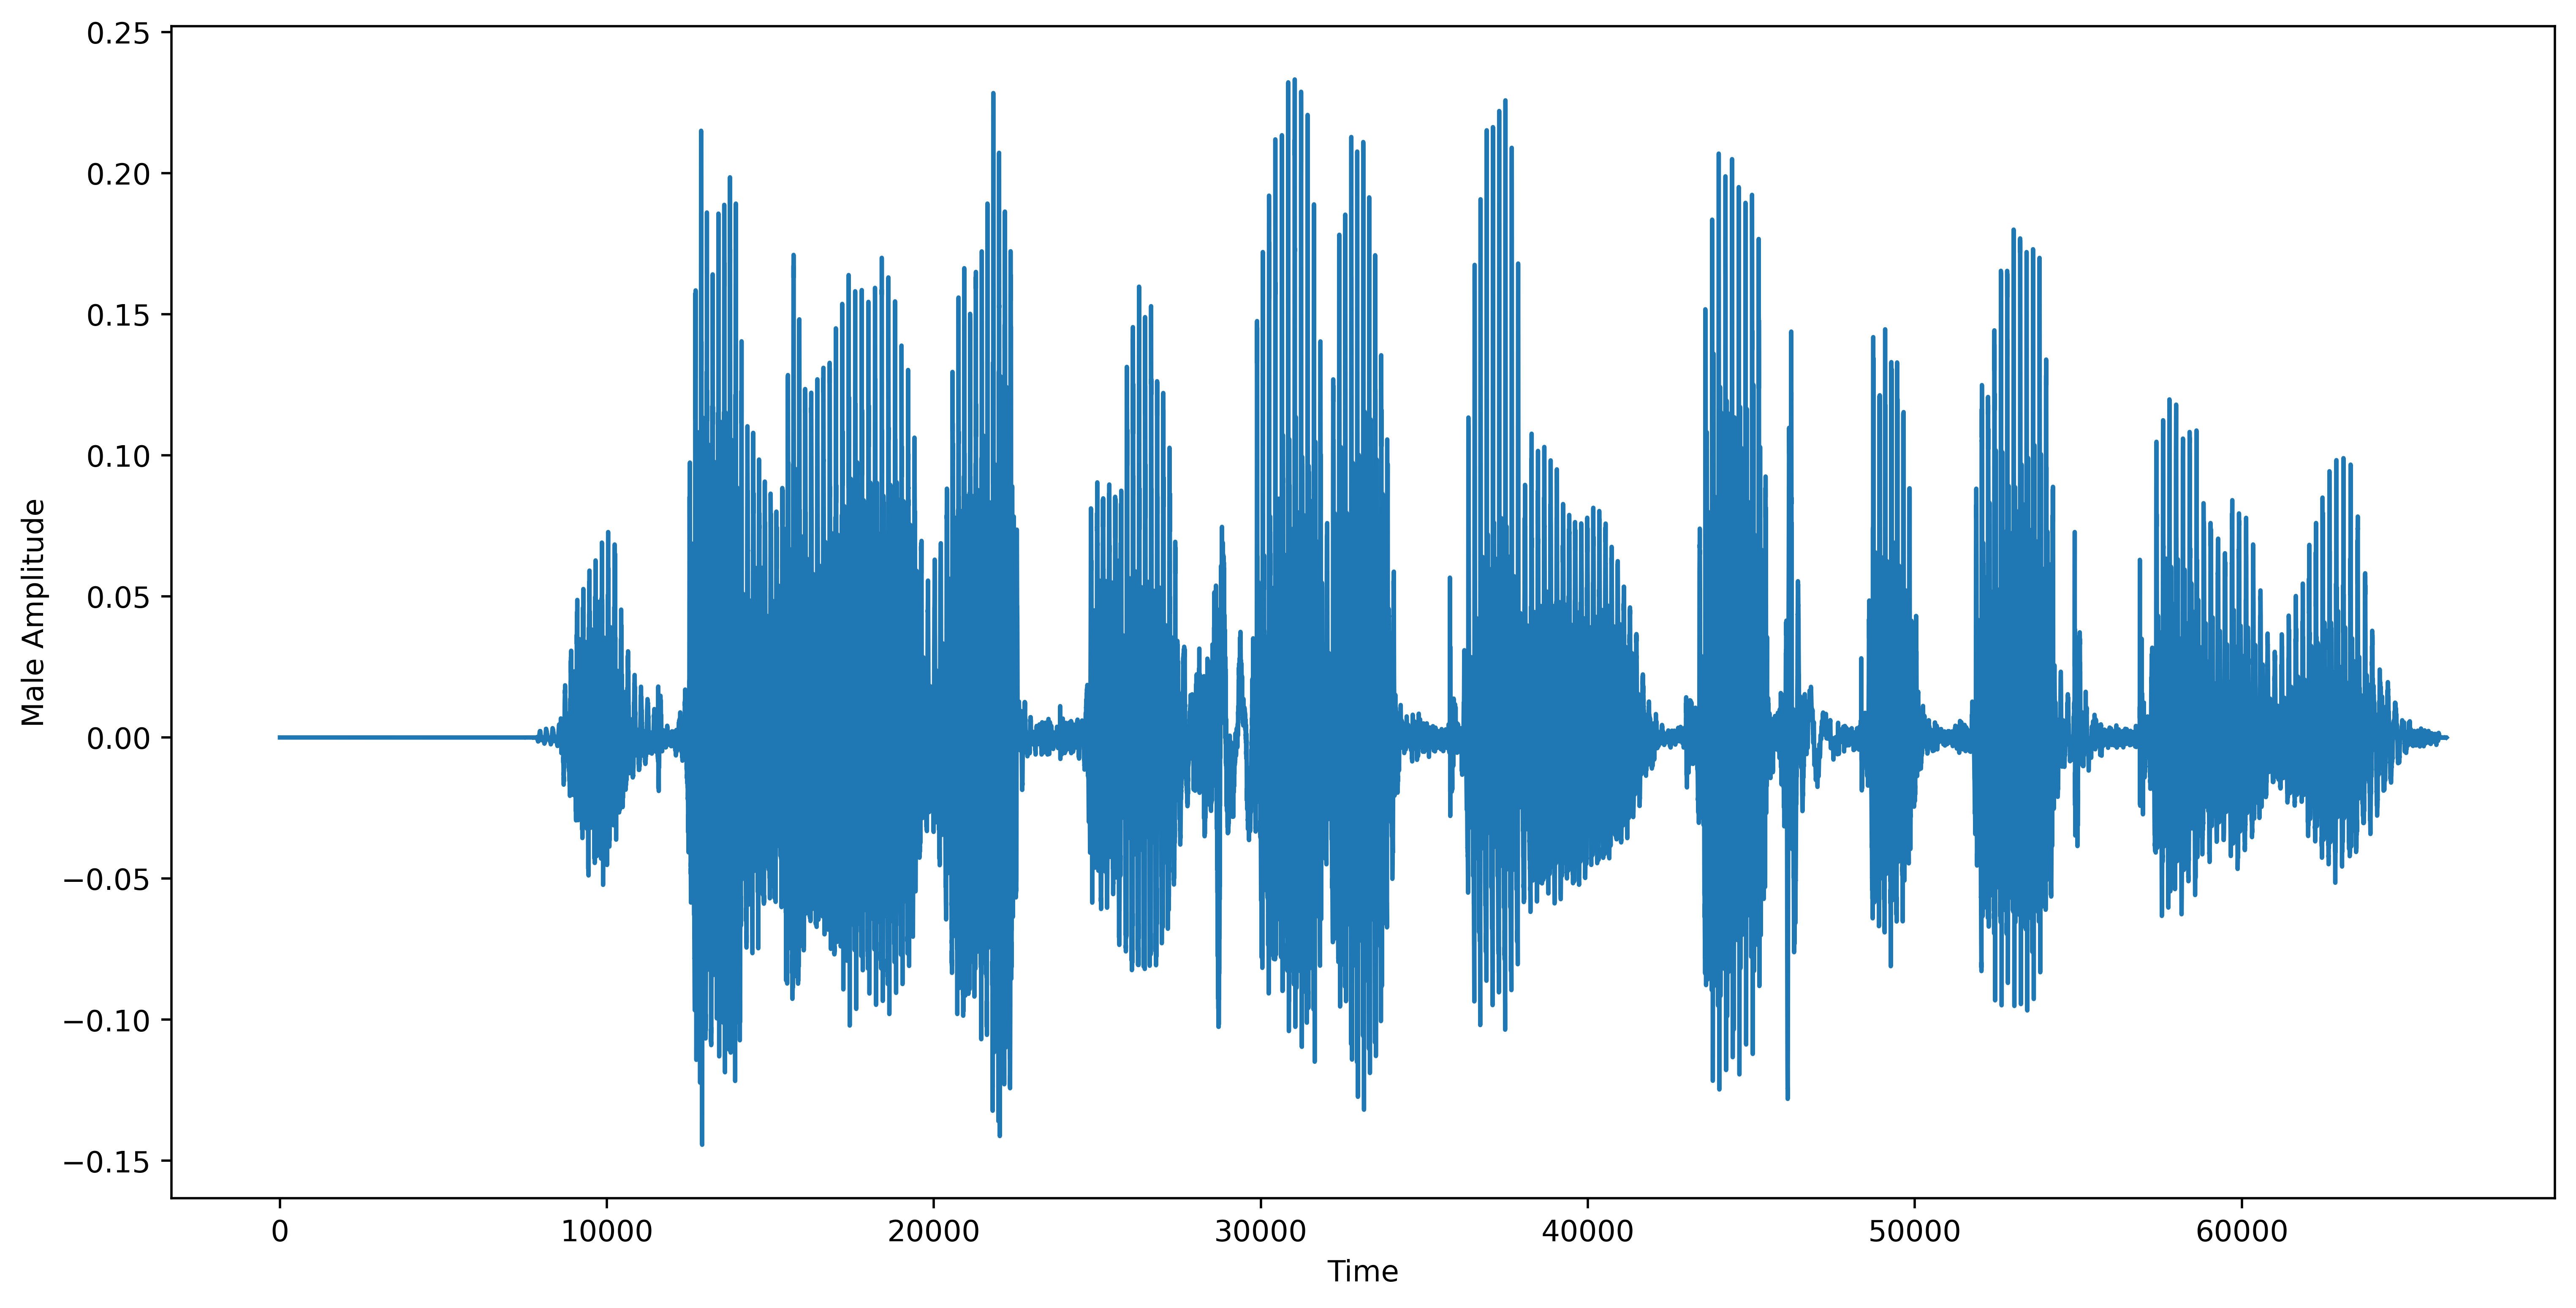

In [7]:
wav_path = "E:\\TextMining\\WAVE\\Data\\Male\\A rafay 18 degar.wav"
data, fs = librosa.load(wav_path)
# fs is sampling frequency
# sampling frequency nothing but how may samples present for second.
print(f"Sampling frequency : {fs} and Wave : {data}")

plt.figure(1,figsize=(12, 6),dpi=500)

plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Male Amplitude")
plt.tight_layout(pad=0)
plt.savefig('MaleAmpl.jpg', bbox_inches='tight')

Sampling frequency : 22050 and Wave : [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5254108e-08
  2.8283676e-08 -3.0215435e-08]


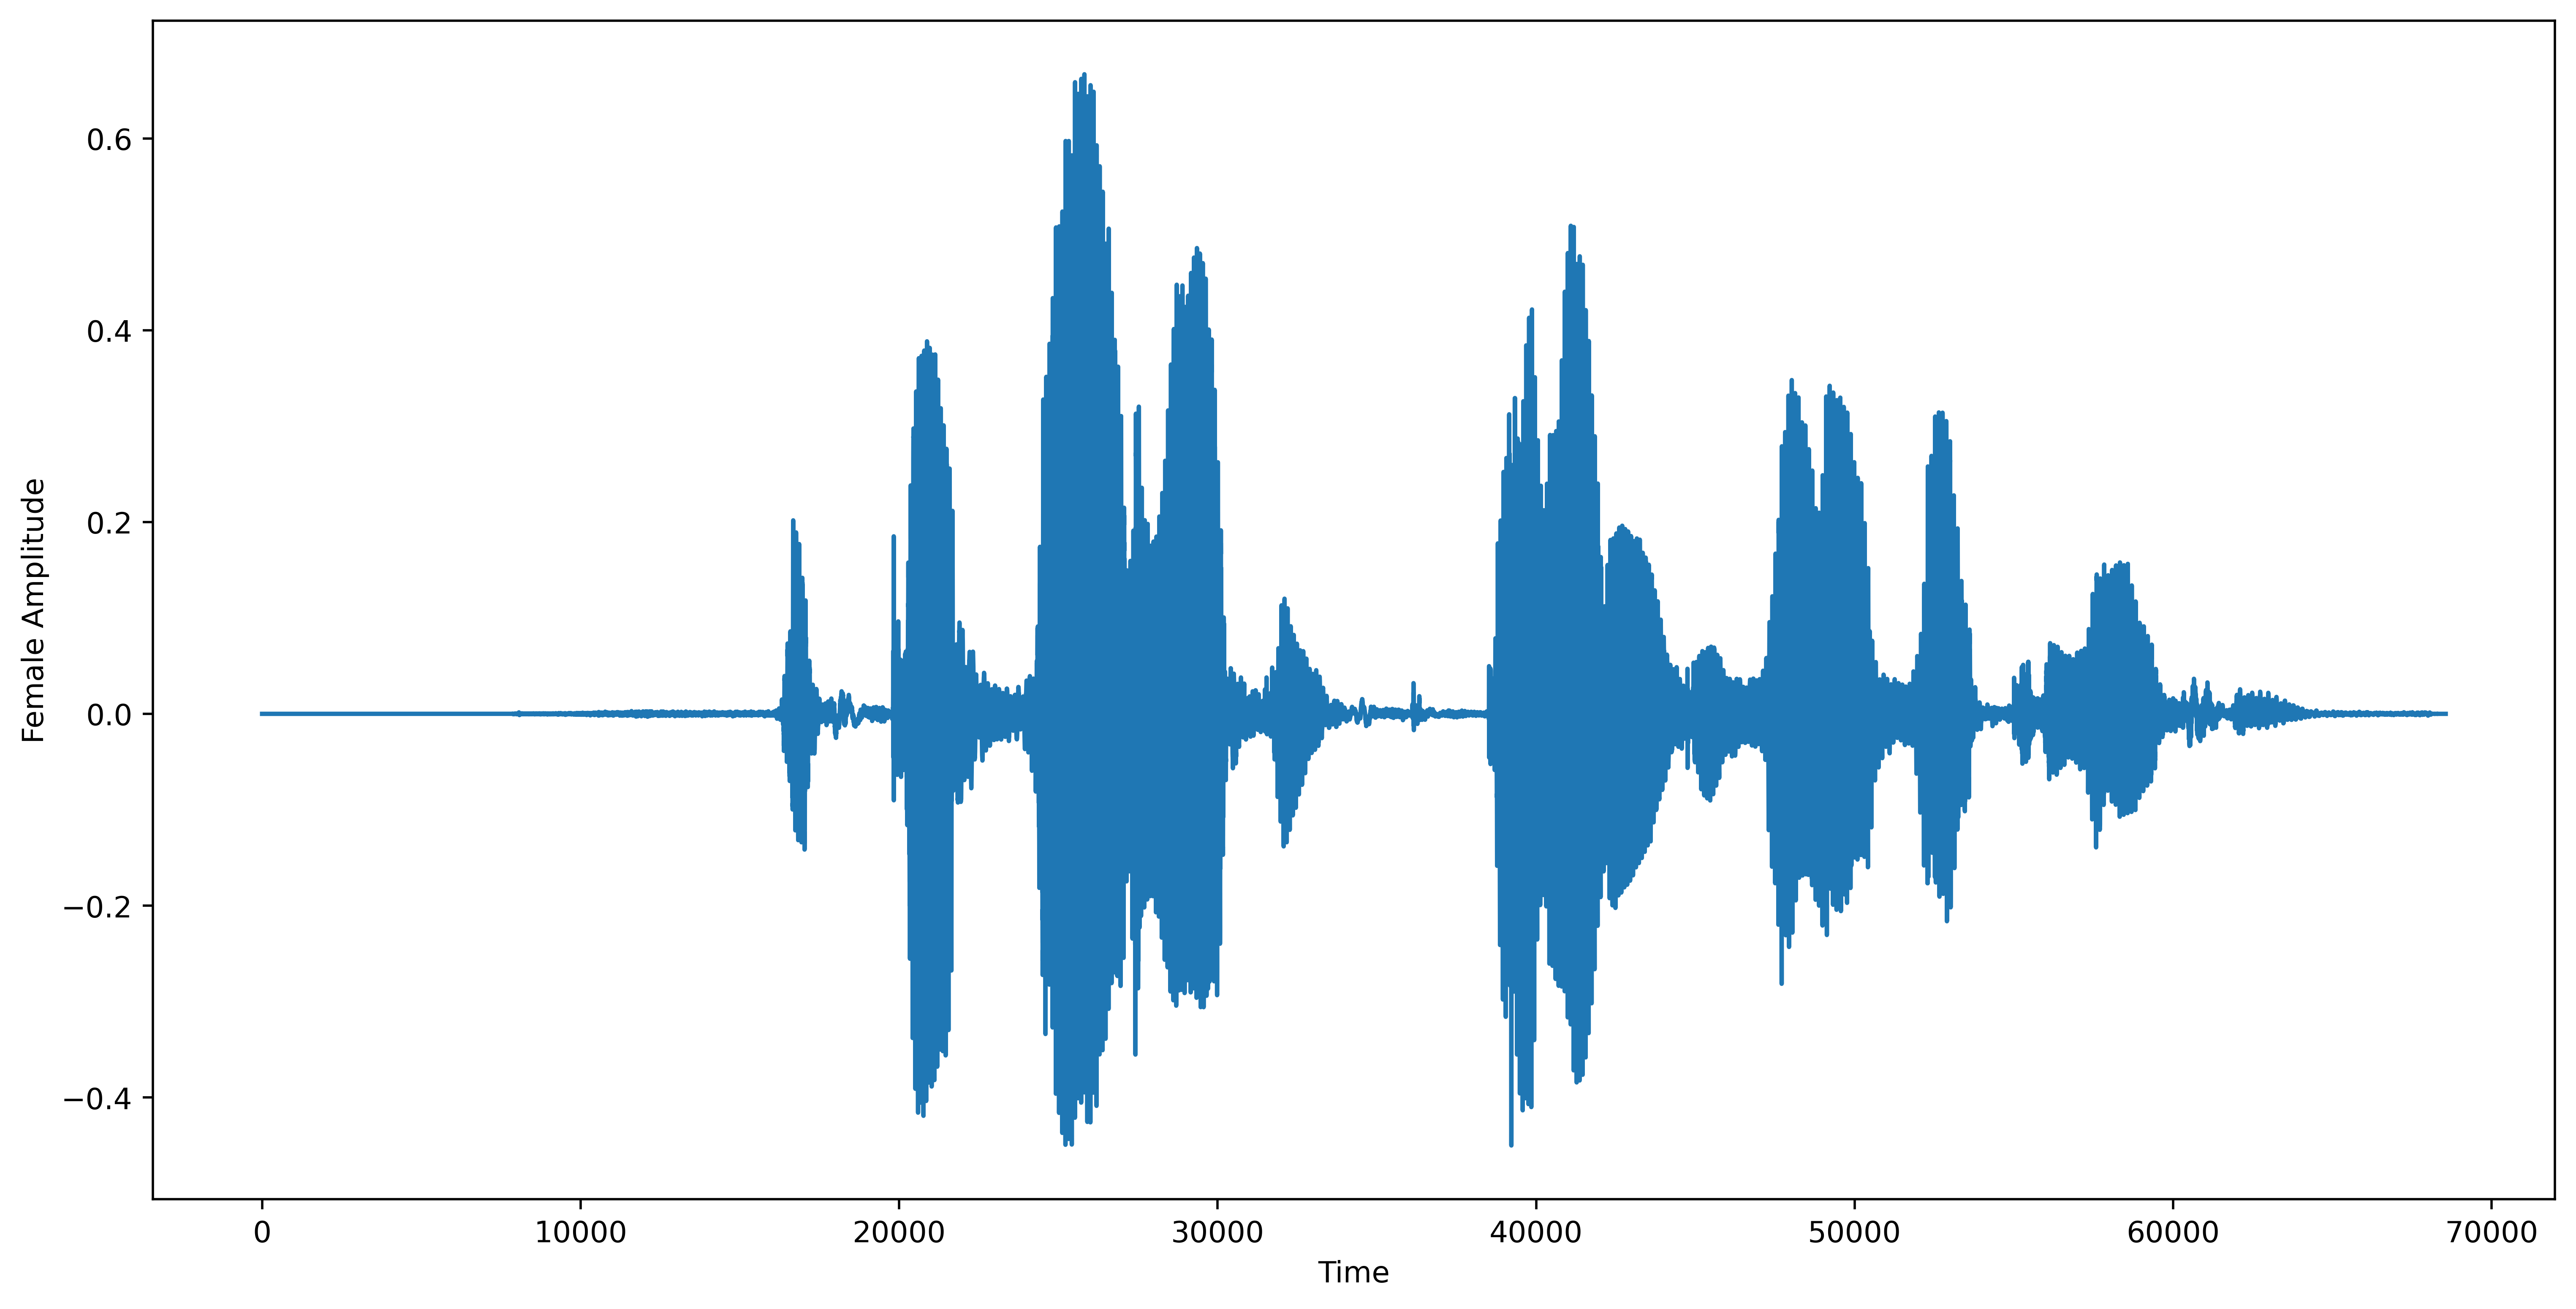

In [8]:
wav_path = "E:\\TextMining\\WAVE\\Data\\Female\\Aima 17 tudal.wav"
data, fs = librosa.load(wav_path)
# fs is sampling frequency
# sampling frequency nothing but how may samples present for second.
print(f"Sampling frequency : {fs} and Wave : {data}")

plt.figure(1,figsize=(12, 6),dpi=500)

plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Female Amplitude")
plt.tight_layout(pad=0)
plt.savefig('femaleAmpl.jpg', bbox_inches='tight')

In [9]:
from sklearn.utils import shuffle
def get_images(directory):
    Feature = []
    Labels = [] 
    
    for labels in os.listdir(directory): 
        
        for image_file in os.listdir(directory+labels): 
            from scipy.io.wavfile import read
            a = read(directory+labels+r'/'+image_file)
            x, fs = librosa.load(directory+labels+r'/'+image_file) 
            mf = librosa.feature.mfcc(y=x, sr=fs, n_mfcc=40)
            mfccs_scaled_features = np.mean(mf.T,axis=0)
            Feature.append(mfccs_scaled_features)
            Labels.append(labels)
    
    return shuffle(Feature,Labels,random_state=817328462) #Shuffle the dataset you just prepared.



In [10]:
#Train data
Feature, Labels = get_images("E:\\TextMining\\WAVE\\Data\\") #Extract the training images from the folders.

Feature = np.array(Feature) #converting the list of images to numpy array.
Labels = np.array(Labels)


C:\Users\knowl\AppData\Local\Temp\ipykernel_21724\701856962.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  a = read(directory+labels+r'/'+image_file)


In [12]:
from collections import Counter
Counter(Labels)

Counter({'Male': 414, 'Female': 373})

In [15]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Feature, Labels, test_size=0.20, shuffle=True)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=300)
dt.fit(X_train,y_train)
yhat_classes = dt.predict(X_test)
print(classification_report(y_test, yhat_classes))
print(confusion_matrix(y_test, yhat_classes))

              precision    recall  f1-score   support

      Female       0.93      0.96      0.95        72
        Male       0.96      0.94      0.95        86

    accuracy                           0.95       158
   macro avg       0.95      0.95      0.95       158
weighted avg       0.95      0.95      0.95       158

[[69  3]
 [ 5 81]]


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train,y_train)
yhat_classes = knn.predict(X_test)
print(classification_report(y_test, yhat_classes))
print(confusion_matrix(y_test, yhat_classes))

              precision    recall  f1-score   support

      Female       0.97      0.94      0.96        72
        Male       0.95      0.98      0.97        86

    accuracy                           0.96       158
   macro avg       0.96      0.96      0.96       158
weighted avg       0.96      0.96      0.96       158

[[68  4]
 [ 2 84]]


In [18]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
rfc = RandomForestClassifier(n_estimators=300, max_depth=300)  
rfc.fit(X_train, y_train)
# calculate accuracy of class predictions
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, yhat_classes))

RF
              precision    recall  f1-score   support

      Female       0.97      0.97      0.97        72
        Male       0.98      0.98      0.98        86

    accuracy                           0.97       158
   macro avg       0.97      0.97      0.97       158
weighted avg       0.97      0.97      0.97       158

[[68  4]
 [ 2 84]]


In [20]:
from sklearn.ensemble import VotingClassifier
r1 = DecisionTreeClassifier(max_depth=300)
r2 = RandomForestClassifier(n_estimators=200, max_depth=50) 
r3 = KNeighborsClassifier(n_neighbors=3)
er = VotingClassifier([('lr', r1),('rf', r2),('knn', r3)],voting="hard")

er.fit(X_train,y_train)
yhat_classes = er.predict(X_test)
print(classification_report(y_test, yhat_classes))
print(confusion_matrix(y_test, yhat_classes))

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97        72
        Male       0.98      0.98      0.98        86

    accuracy                           0.97       158
   macro avg       0.97      0.97      0.97       158
weighted avg       0.97      0.97      0.97       158

[[70  2]
 [ 2 84]]


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(er, Feature, Labels, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.01
